<figure> 
<img src="../imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Minicurso de Ciencia de Datos<center></span>

## <span style="color:Green"><center>Introducción al análisis en componentes principales</center></span>

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 
1. Campo Elías Pardo, PhD, cepardot@unal.edu.co

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

5. Maria del Pilar Montenegro, pmontenegro88@gmail.com
6. Jessica López Mejía, jelopezme@unal.edu.co
7. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

8. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

9. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

10. Dairo Moreno, damoralesj@unal.edu.co
11. Joan Castro, jocastroc@unal.edu.co
12. Bryan Riveros, briveros@unal.edu.co
13. Rosmer Vargas, rovargasc@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

14. Giovvani Barrera, udgiovanni@gmail.com
15. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Introducción</span>

El análisis en componentes principales (ACP) es muy conocido en la Ciencia de Datos como una técnica de reducción de dimensión, pero es mucho más que eso. Si se aborda desde un punto de vista geométrico, es una técnica poderosa para la visualización de datos. Su generalización ha permitido el desarrollo de otros métodos sobre todo para la descripción de variables cualitativas, en cuyo caso también sirve como método de cuantificación de lo cualitativo. Esa visión geométrica de origen francés es la que presentamos aquí. Hacemos uso del R en primera instancia para entender los métodos y luego para llevarlos a la práctica. En este cuaderno introducimos el ACP como se conoce en la mayoría de los ámbitos y que podemos llamar ACP canónico, y al final presentamos el ACP general o generalizado, como un marco común a los métodos derivados, que podemos llamar métodos factoriales o en ejes principales, de los que forman parte los análisis de correspondencias simples y múltiples.

Con ejemplos unos de juguete y otros de aplicaciones pequeños se presentan todos los métodos, los cuales se verán con mayor detalle en el Diplomado de Ciencia de Datos y consultar en mi libro *Estadística descriptiva multivariada*, disponible en PDF en la página Web de la Facultad de Ciencias, Universidad Nacional de Colombia Sede Bogotá, enlace corto: https://repositorio.unal.edu.co/handle/unal/79914

## <span style="color:blue"><center>Geometría de una variable</center></span>

### Datos

Se tiene la variable $Y_1$, con los valores:

In [1]:
Y1 <- c(9,7,8,3,1,3,4,7,2,6)
cat("Y1 = ",Y1)

Y1 =  9 7 8 3 1 3 4 7 2 6

#### Promedio de los datos

In [2]:
g1=mean(Y1)
cat("\nmedia de Y1 = ",g1)


media de Y1 =  5

La media o promedio, corresponde al concepto *centro de gravedad* de la física ($g_1$). Si se suponen los puntos como esferas de igual peso, sobre una barra de densidad homogénea la barra queda equilibrada, si se apoya en el punto $g_1$.


#### Datos centrados

Centrar los datos es restarle a cada punto la media $g_1$

Sea $X_1 = Y_1 - g_1$  

In [3]:
X1 = Y1 - g1
cat("X1 = ",X1)

X1 =  4 2 3 -2 -4 -2 -1 2 -3 1

Con esta transformación el punto de apoyo para lograr el equilibrio se situa en $0$

In [4]:
mean(X1)

[1] 0

#### Representación de $Y_1$ y $X_1$ en la recta real:

<figure> 
<img src="../imagenes/geometriaY1.png"  width="480" height="480" align="left"/> 
</figure>




En la segunda barra, el origen se traslada al centro de gravedad y los valores se obtienen restándoles $g_1 = 5$. Sea $X_1 = Y_1 - g_1$ 

Es importante ver que la media es el valor que hace mínima la suma de cuadrados de las distancias entre cada punto el valor. Lo que se hace a continuación es solo para verlo para quienes quieran entenderlo. Sin embargo, es suficiente ver que este resultado se puede demostrar matemáticamente. 

Sea la función $$f(a) = \sum_{i=1}^{10} p_i (y_{i1} - a)^2$$ donde $p_i = 1/10$

Entonces podemos buscar el valor de $a$ que minimice la suma de cuadrados $f(a)$, ese valor se obtiene igualando el valor de la derivada de $f(a)$ a $0$ es decir $$f'(a) = 2 \sum_{i=1}^{10} p_i (y_{i1} - a) = 0$$ entonces $$a = \sum_{i=1}^{10} p_i y_{i1}$$

que es igual al centro de gravedad (media o promedio) de $Y_1$


#### Varianza de los datos

Sea $V_1$, la varianza de $Y_1$, entonces $$V_1 =\frac{1}{10} \sum_{i=1}^{10} (y_{i1}-g_1)^2 =\frac{1}{10} \sum_{i=1}^{10} x_{i1}^2$$

Estas fórmulas corresponden al momento de inercia de los puntos respecto al centro de gravedad, que en Estadística descriptiva multivariada denominamos *inercia* para generalizar el concepto de varianza cuando se consideran varias variables simultáneamente. 

La varianza de $Y_1$, que es igual a la de $X_1$ es:


In [5]:
V1=1/10*sum(X1*X1);V1

[1] 6.8

## <span style="color:blue"><center>Geometría de dos variables</center></span>

Sea la variable $Y_2$ con los valores:


In [6]:
Y2=c(9,13,6,1,5,11,4,3,8,10)
cat("Y2 = ",Y2)

Y2 =  9 13 6 1 5 11 4 3 8 10

In [7]:
g2=mean(Y2)
cat("\nmedia de Y2 = ",g2)


media de Y2 =  7

$X_2$ es $Y_2$ centrado

In [8]:
X2=Y2-g2
cat("X2 = ",X2)


X2 =  2 6 -1 -6 -2 4 -3 -4 1 3

Varianza de $Y_2$

In [9]:
V2=1/10*sum(X2*X2)
cat("V2 = ",V2)

V2 =  13.2

Nótese que $X_2$ es más disperso que $X_1$, en efecto las $V_2$ es mayor que $V_1$

In [10]:
V1

[1] 6.8

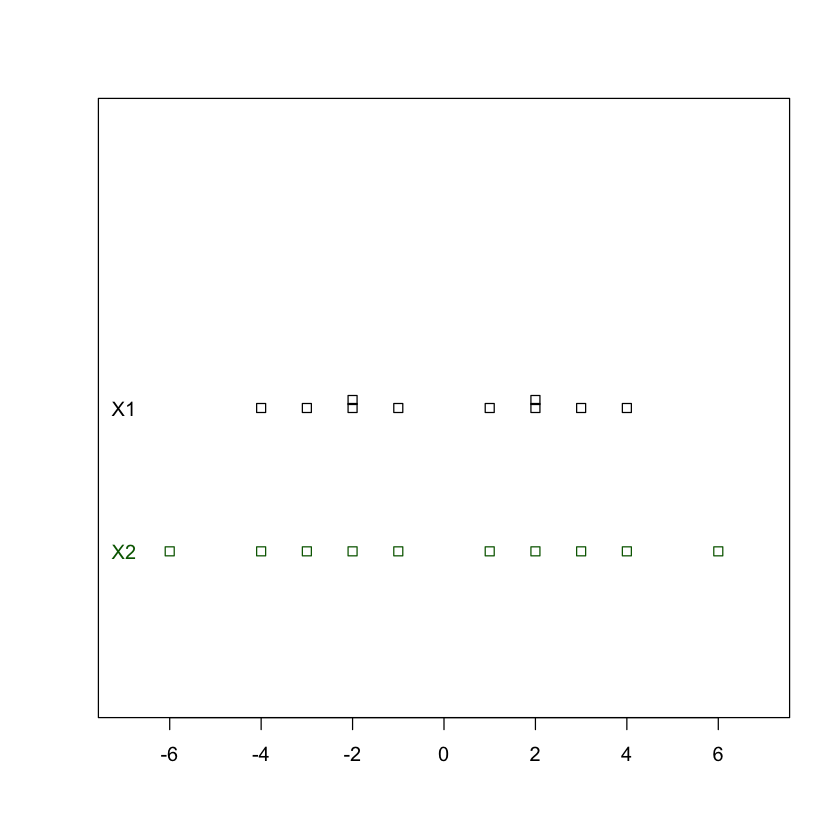

In [11]:
stripchart(X1,method = "stack",xlim=c(-7,7))
text(-7,1,"X1")
stripchart(X2,method = "stack",add=TRUE,col="darkgreen",at = 0.5)
text(-7, 0.5, "X2",col="darkgreen")

### Diagrama de dispersión de las dos variables

Si se consideran las dos variables simultáneamente, las parejas de datos se tratan como vectores de dimensión 2, se guardan en una matriz de 10 filas por dos columnas y se representan en un diagrama de dispersión.


Matriz Y transpuesta 

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10
Y1,9,7,8,3,1,3,4,7,2,6
Y2,9,13,6,1,5,11,4,3,8,10


Centro de gravedad = [ 5 7 ]

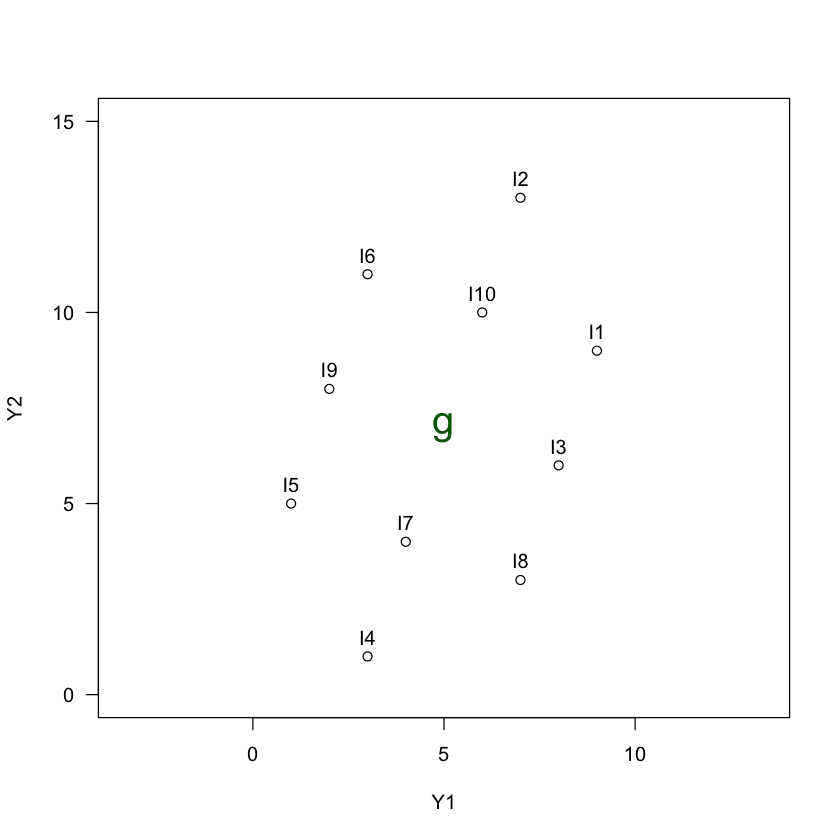

In [12]:
Y=cbind(Y1=Y1,Y2=Y2)
# identificación de las filas
rownames(Y)=paste("I",1:10,sep="")
cat("Matriz Y transpuesta ")
t(Y)
g=colMeans(Y)
cat("Centro de gravedad = [",g,"]")
plot(Y,las=1,xlim=c(0,10),ylim=c(0,15),asp=1)
text(Y,labels=rownames(Y),pos=3)
text(g[1],g[2],col="darkgreen",labels="g",cex=2)

Diagrama de dispersión transladando el origen al centro de gravedad (centrado)

In [13]:
X = Y-rep(1,10)%*%t(g)
cat("Matriz centrada X")
colnames(X)=c("X1","X2")
t(X)
cat("centro de gravedad = [",colSums(X),"]")

Matriz centrada X

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10
X1,4,2,3,-2,-4,-2,-1,2,-3,1
X2,2,6,-1,-6,-2,4,-3,-4,1,3


centro de gravedad = [ 0 0 ]

Diagrama de dispersión de los datos centrados

Matriz de varianzas y covarianzas de Y o X

,Y1,Y2
Y1,6.8,2.4
Y2,2.4,13.2


Matriz de correlaciones de Y o X

,Y1,Y2
Y1,1.000,0.253
Y2,0.253,1.000


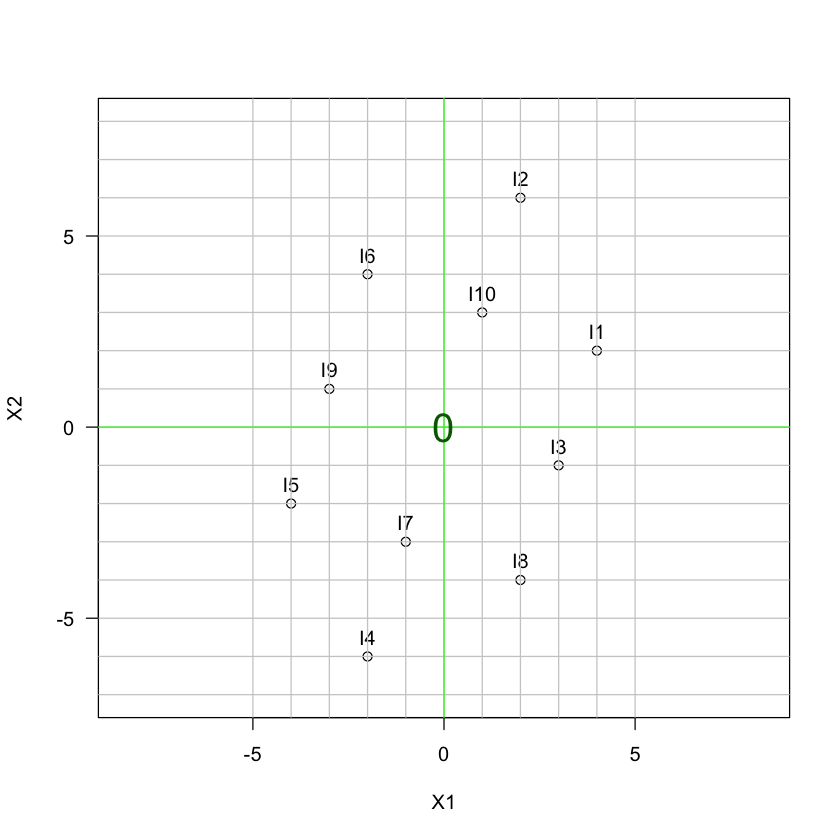

In [14]:
plot(X,las=1,asp=1,xlim=c(-5,5),ylim=c(-7,8))
text(X,labels=rownames(X),pos=3)
abline(v=-5:5,h=-7:8,col="gray80")
abline(v=0,h=0,col="green")
text(0,0,"0",col="darkgreen",cex=2)
cat("Matriz de varianzas y covarianzas de Y o X")
V<-cov(Y)*9/10;V
cat("Matriz de correlaciones de Y o X")
R <- cor(Y); round(R,3)

### Eje de mayor proyección

A ojo: linea con origen en 0 y pendiente 3

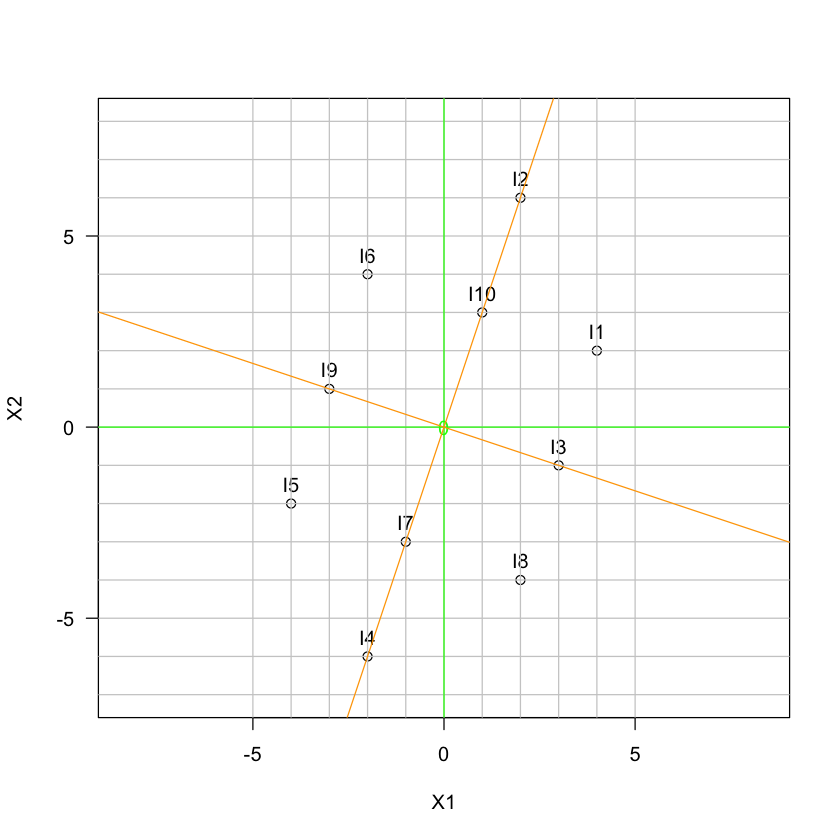

In [15]:
plot(X,las=1,asp=1,xlim=c(-5,5),ylim=c(-7,8))
text(X,labels=rownames(X),pos=3)
abline(v=-5:5,h=-7:8,col="gray80")
abline(v=0,h=0,col="green")
text(0,0,"0",col="green")
abline(0,3,col="orange")
# eje perpendicular
abline(0,-1/3,col="orange")

Completar el ejercicio en papel cuadriculado y midiendo las proyecciones con regla.
Para ver aquí el resultado (rotación) utilizo funciones de *ade4* y *FactoClass*.

In [16]:
rota<-dudi.pca(Y,scannf=FALSE,scale=FALSE) # Se realiza ACP 
cat("Coordenadas sobre los nuevos ejes")
F=rota$li
round(t(F),2)
# grafica con plot.dudi{FactoClass}
plot(rota,Tcol=FALSE,cex.row=1.2,gg=TRUE)
#abline(v=0,h=0,col="orange")

ERROR: Error in dudi.pca(Y, scannf = FALSE, scale = FALSE): no se pudo encontrar la función "dudi.pca"


Los nuevos ejes que soportan la *nube de puntos* son nuevas variables: sumas ponderadas de las dos variables originales $X_1$ y $X_2$. Los valores para los 10 puntos constituyen la matriz **F**.   

Lambda=var(F)*9/10
cat("Matriz de varianzas y covarianza sobre los nuevos ejes")
round(Lambda,3)
cat("Traza de Lambda =",sum(diag(Lambda)))
cat("\nMatriz V (varianzas y covarianzas de Y")
V
cat("Traza de V =",sum(diag(V)))

Nótese que la suma de varianzas de **V** --traza(**V**)-- es igual a la de las nuevas variables traza(**$\Lambda$)** 

Lo que cambia es que $F_1$ tiene más varianza que $F_2$ y las dos nuevas variables no están correlacionadas.

## <span style="color:blue"><center>Geometría de tres variables</center></span>

Como ejemplo de juguete se utiliza la tabla de los 10 tratamientos de los datos *cafe{FactoClass}*, utilizando las 3 variables físicas presentes: *Color*, *DA* (densidad aparente) y *EA* (estrato acuoso. La nube de los 10 puntos (vectores de 3 componentes) requiere de 3 ejes y aún la podemos visualizar.

In [ ]:
data(cafe)
Y<-cafe[1:10,1:3]

In [ ]:
par(las=1); # grafica;
Y3D<-scatterplot3d(Y,main="Y",type="h",color="black",box=FALSE,
				   las=1); 
Y3D$points3d(Y,pch=1);
addgrids3d(Y, grid = c("xy","xz","yz"));
cord2d<-Y3D$xyz.convert(Y) # convertir cordenadas 3D a 2D;
# poner etiquetas;
text(cord2d,labels=rownames(Y), cex=0.8,col="black",pos=3); 
# poner el centro de gravedad en la gráfica
g <- colMeans(Y) 
Y3D$points3d(t(g),pch=19,col="darkgreen",type = "h");
text(Y3D$xyz.convert(t(g)),labels="g",pos=3,col="black",
     cex=1.3);
t(Y) 


Datos centrados

In [ ]:
# cálculo de la matriz de datos centrados y representación en 3D
Yc<-scale(Y,scale=FALSE)   #calculo
attr(Yc,"scaled:center")->g  #la función scale muestra el centro de gravedad
t(rbind(Yc,g))
# grafica de datos centrados
par(las=1);
Yc3D<-scatterplot3d(Yc,main="Yc",type="h",color="black",
	               box=FALSE,las=1);
Yc3D$points3d(Yc,pch=1);
addgrids3d(Yc,grid=c("xy", "xz", "yz"));
text (Yc3D$xyz.convert(Yc),labels=rownames(Yc),cex=0.8,
	  col="black",pos=3);
Yc3D$points3d(t(c(0 ,0 ,0)),pch=19 , col ="darkgreen",type = "h");
text(Yc3D$xyz.convert (t(c(0 ,0 ,0))),labels ="0",pos =3, 
     col ="darkgreen",cex =1.3);


#### **Cálculo y gráfica 3D de la matriz de datos estandarizados X**

In [ ]:
# Cálculo de matriz X estandarizada
X<-scale(Y)
# aquí la función scale calcula la media y la desviación estándar
# las varianzas que calcula R es la muestral: se divide por n-1
round(attr(X,"scaled:scale"),1)->Des
# X transpuesta + g + Des
t(round(rbind(X,g,Des),2))
# gráfica de la matriz centrada y reducida (estandrizada)
par(las=1) # etiquetas de los dos ejes sean horizontales;
X3D<-scatterplot3d(X,main="X",type ="h",box=FALSE,asp=1); 
X3D$points3d(Yc,pch=1);
addgrids3d(X,grid=c("xy","xz","yz"),col.grid="grey80");
text (X3D$xyz.convert(X),labels=rownames(X),cex=0.8,pos=3);
X3D$points3d (t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(X3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,col="darkgreen"
	 ,cex=0.8);


#### Rotación de ejes o cambio de base

In [ ]:
acp=dudi.pca(Y,scannf=FALSE,nf=3)

In [ ]:
par(las=1) # etiquetas de los dos ejes sean horizontales;
X3D<-scatterplot3d(F,main="F",type ="h",box=FALSE,asp=1); 
X3D$points3d(F,pch=1);
addgrids3d(F,grid=c("xy","xz","yz"),col.grid="grey80");
text (X3D$xyz.convert(F),labels=rownames(F),cex=0.8,pos=3);
X3D$points3d (t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(X3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,col="darkgreen"
	 ,cex=0.8)

In [ ]:
cat("Tabla de coordenadas sobre los nuevos ejes")
F=acp$li;round(t(F),2)

#### Mejor plano de proyección

In [ ]:
plot(acp,Tcol=FALSE,asp=1,gg=TRUE)

#### Círculo de correlaciones

In [ ]:
s.corcircle(acp$co)

#### Proyección en el plano 1-3

In [ ]:
plot(acp,1,3,Tcol=FALSE,asp=1)

In [ ]:
s.corcircle(acp$co,1,3)

## <span style="color:blue"><center>Geometría de *p* variables y *n* individuos</center></span>


<figure> 
<img src="../imagenes/esquemaTabla.png"  width="240" height="240" align="left"/> 
</figure>

## <span style="color:blue"><center>Ejemplo de *p=5* variables y *n=445* individuos</center></span>

Resultados de los 5 componentes de los admitidos a las 7 carreras de la Facultad de Ciencias para el primer semestre de 2013. 

#### Extracto de la tabla


In [ ]:
data(admi)
Y=admi[,2:6]
Y[seq(1,445,50),]
# Matriz de varianzas y covarianzas
V=var(Y)*444/445
round(V,3)

ACP sin estandarizar, ya que los resultados están expresados con media 10 y desviación estándar 1, con todos los resultados (admitidos y no admitidos para todas las carreras).

In [ ]:
#paquete para graficas utilizando ggplot2
#install.packages("factoextra")
library(factoextra)

In [ ]:
acpadmi<-dudi.pca(Y,scale=FALSE,scannf=FALSE)
# histograma de valores propios
fviz_eig(acpadmi) #función de factoextra
inertia(acpadmi)

In [ ]:
"promedio de valores propios"
round(sum(acpadmi$eig)/5,4)

**Dos ejes son suficientes para una síntesis de los resultados**
 1. La varianza del primer eje es casi el doble de la del segundo, en el gráfico se destaca de los demás, su varianza corresponde al 38.4 de la inercia
 2. El segundo eje alcanza casi el valor del promedio.
 3. El primer plano factorial (ejes 1 y 2) retiene un 58.3% de la inercia total (5.009).

#### Primer plano factorial de las variables


In [ ]:
fviz_pca_var(acpadmi) #función del paquete factoextra

El primer eje es un factor tamaño: el lado negativo del primer eje significa mayores resultados en todos los componentes, sobretodo en matemáticas. Los coeficientes del primer eje son:

In [ ]:
rownames(acpadmi$c1)
round(acpadmi$c1[,1],3)

El lado positivo del segundo eje indica sobretodo mejores resultados en imagen y el negativo en textual, seguido de sociales. Los coeficientes son:

In [ ]:
rownames(acpadmi$c1)
round(acpadmi$c1[,2],3)

#### Primer plano factorial de los admitidos

In [ ]:
fviz_pca_ind(acpadmi,label="NONE")

#### La carrera como variable cualitativa suplementaria

In [ ]:
carrsup=supqual(acpadmi,as.data.frame(admi$carr))
#plano12
plano12=fviz_pca_ind(acpadmi,col.ind="yellow",label="NONE")
fviz_add(plano12,carrsup$coor,repel=TRUE)

#### *Zoom* de las carreras 

In [ ]:
plotfp(supcarr$coor)
round(data.frame(coor=carrsup$coor,tval=carrsup$tv),3)

Los promedios de las carreras quedan ordenadas de mayor (-) a menor(+) en el primer eje: Matemáticas, Física, Geología, Biología, Química, Farmacia y Estadística. En el segundo eje se oponen Matemáticas (+) y Farmacia (-), lo que indica mejor rendimiento promedio en imagen para los admitidos a Matemáticas y mayor en Textual para Farmacia.

## <span style="color:blue"><center>Análisis en componentes principales generalizado *ACP*(**X,M,N**)</center></span>

Casi todos los métodos en ejes principales (factoriales) se puede derivar de este procedimiento general. Aunque es un poco técnico también se puede ver como una caja negra, quienes quieran entenderlo matemáticamente necesitan conocer los conceptos de álgebra lineal, específicamente lo que tiene que ver con los espacios vectoriales en los reales con producto interno. De un producto interno se deriva una métrica (distancia) y todo lo que se requiere para la representación gráfica multidimensional de tablas de datos. 

Una tabla de datos se transforma en una matriz **X** del *ACP*(**X,M,N**) es la que se va a representar geométricamente. **X** tiene $n$ filas y $p$ columnas.


<figure> 
<img src="../imagenes/esquemaTabla.png"  width="240" height="240" align="left"/> 
</figure>

La matriz **X** tiene dos representaciones geométricas:
1. $n$ vectores fila (puntos fila) en $\mathbb{R}^p$, es decir que los ejes son las columnas de **X**. *Espacio de las filas*. *Nube de puntos fila*
2. $p$ vectores columna (puntos, flechas en el ACP) en $\mathbb{R}^n$ *Espacio de las columnas*. *Nube de columnas*

Los dos espacios están relacionados y se denomina *dualidad* entre las dos representaciones. Esto se puede resumir en un diagrama de dualidad y sus fórmulas asociadas.


### <span style="color:blue"><center>Diagrama de dualidad del *ACP*(**X,M,N**)</center></span>

<figure> 
<img src="../imagenes/DuDiMDpn.png"  width="480" height="480" align="left"/> 
</figure>

$E = \mathbb{R}^p$ es el espacio de las filas, $E = \mathbb{R}^p$ es el espacio de las columnas.
$E^{*}$ se llama el espacio dual de $E$, y $F^{*}$ el dual de $F=\mathbb{R}^p$.

Esta es la "caja negra" del *ACP*(**X,M,N**) y abrirla completamente requiere conocimientos de geometría euclidiana multidimensional, que está basada en álgebra lineal. En resumen, para los métodos con matrices de métrica diagonales:
1. **X** matriz obtenida mediante alguna transformación de los datos.
2. **M** matriz de producto interno, *métrica* en el espacio de las filas y de pesos de las columnas (vector en la diagonal).
3. **N** matriz de *métrica* en el espacio de las columnas y de pesos en el espacio de las filas.

Con la función *as.dudi{ade4}* se obtiene los resultados de un *ACP*(**X,M,N**):


<figure> 
<img src="../imagenes/Diagasdudi.png"  width="960" height="960" align="left"/> 
</figure>

Esta función es interna del *ade4* y es llamada por los otros procedimientos específicos.

A continuación se presentan, con ejemplos de juguete, los siguientes métodos:
1. ACP canónico = $ACP(\mathbf{X},\mathbf{I}_p,\frac{1}{n}\mathbf{I}_n)$, ya visto.
2. Imagen geométrica de matrices de varianzas y covarianzas o de correlaciones.
3. Imagen geométrica de una matriz de distancias euclidianas.
4. Análisis de correspondencias simples (ACS).
5. Análisis de correspondencias múltiples.


### <span style="color:blue"><center>Análisis en componentes principales (ACP)</center></span>

<figure> 
<img src="../imagenes/Diagdudipca.png"  width="960" height="960" align="left"/> 
</figure>

### <span style="color:blue"><center>Imagen geométrica de matrices de correlaciones</center></span>

Diagrama de dualidad incompleto = Parte superior del diagrma de dualidad =  $ACP(\mathbf{V,M})$

<figure> 
<img src="../imagenes/DuDiV.png"  width="480" height="480" align="left"/> 
</figure>

* **V**: matriz de covarianzas o matriz de correlaciones (no se conoce **X**)

* $\mathbf{M}=\mathbf{I}_p$

* Valores y vectores propios de **V**

* $\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_p $

* $\mathbf{u}_1, \mathbf{u}_2, \cdots, \mathbf{u}_p$

* Coordenadas: $G_s = \sqrt{\lambda_s} \mathbf{u}_s$


#### Ejemplo: matriz de correlaciones de los componentes del examen de admisión de los admitidos a las siete carreras de la Facultad de Ciencias Unal Bogotá, primer semestre 2013

1. Cálculo de la matriz de correlaciones para el ejemplo

In [ ]:
library(FactoClass)
data(admi)
"Matriz de correlaciones"
V <- cor(admi[,2:6])
as.dist(round(V,3)) # matriz de correlaciones


2. Obtención de las coordenadas de las variables

In [ ]:
eigV <- eigen(V)
Lambda<-diag(eigV$values)
U<-eigV$vectors
G<-U%*%sqrt(Lambda)
rownames(G)<-colnames(V)
round(G,3)

3. Selección del número de ejes para lectura e interpretación

In [ ]:
barplot(Lambda)
"Promedio de valores propios"
sum(Lambda)/5
abline(h=1,col="orange")

In [ ]:
valp = diag(Lambda)
tablavp = data.frame(valp,porvp=valp*100/sum(valp),
                     poracu=cumsum(valp)*100/sum(valp))
round(tablavp,2)

Dos ejes son suficientes para una lectura sintética de la matriz de correlaciones

4. Círculos de correlaciones

In [ ]:
# primer círculo de correlaciones
s.corcircle(G,fullcircle=FALSE)

Sociales y textual tienen entre si una correlación apreciable, los mismo que ciencias y matemáticas; matemáticas y ciencias tienen correlación baja con imagen; imagen prácticamente no está correlacionada con sociales, ni textual. A continuación se presenta, de nuevo, la matriz de correlaciones, para la lectura numérica.

In [ ]:
as.dist(round(V,3))

### <span style="color:blue"><center>Imagen geométrica de matrices de distancias euclidianas = Análisis en coordenadas principales (ACO)</center></span>

**D** es una matriz de distancias euclidianas y *nf* el número de ejes a retener para lectura e interpretación.

#### <span style="color:blue"><center>Diagrama de dualidad incompleto</center></span>

<figure> 
<img src="../imagenes/DuDiW.png"  width="480" height="480" align="left"/> 

Es la parte inferior del diagrama no se tiene la parte superior porque no se conocen los datos.

De la matriz de distancias **D** se obtiene la matriz de productos internos **W**, la métrica **N** suele ser la matriz identidad $n \times n$ multiplicada por $1/n$. Entonces a la matriz $\frac{1}{n} \mathbf{W}$ es a la que se le halla los valores y vectores propios.

Estos cálculos y otros se obtienen con la función *dudi.pco{ade4}*.


#### <span style="color:blue"><center>Función *dudi.pco{ade4}*</center></span>

<figure> 
<img src="../imagenes/Diagdudipco.png"  width="960" height="960" align="left"/> 

### Ejemplo de juguete: imagen euclidiana de la matriz de distancias el ejemplo café con todas las variables, estandarizadas.

1. Obtención de la matriz de distancias eucludianas

In [ ]:
data(cafe)
D=dist(scale(cafe))
round(D,2)

2. Selección del número de ejes

In [ ]:
aco <- dudi.pco(D,scannf=FALSE)
barplot(aco$eig,las=1)

In [ ]:
round(inertia(aco)$tot.inertia,2)->ineraco
ineraco
"Promedio de valores propios"
round(mean(ineraco$inertia),2)

Tres valores propios están por encima del promedio y acumulan el 88.7\% de la inercia.

3. Primer plano factorial

In [ ]:
# para agregar el tercer eje a las tablas del objeto aco
aco<-redo.dudi(aco,newnf=3)
plot(aco,gg=T,Tcol=FALSE)

Se observa que el primer eje ordena los cafes de más contaminados (a la izquierda del plano) y el segundo eje separa los de tostación clara (abajo) de los de tostación oscura (arriba).

4. Plano factorial 1-3

In [ ]:
plot(aco,1,3,gg=T,Tcol=FALSE)

Nótese que el tercer eje separa los dos cafés comerciales de los 10 tratamientos experimentales.




## <span style="color:blue"><center>Análisis de correspondencias simples (ACS)</center></span>

<figure> 
<img src="../imagenes/Diagdudicoa.png"  width="960" height="960" align="left"/> 

**K** es una tabla de contingencia, de frecuencias o de números positivos; y *nf* el número de ejes a retener para lectura e interpretación.

### <span style="color:blue"><center>Ejemplo de juguete</center></span>

Tabla de contingencia de admitidos a la Facultad de Ciencias *Carrera x Estrato

1. Tablas de: contingencia **K**, de frecuencias relativas **F**, de desviados al modelo de independencia **F**-**A**


In [ ]:
K<-unclass(table(admi$carr,admi$estr))
addmargins(K)

In [ ]:
F = K/sum(K)
addmargins(round(F*100,1))

In [ ]:
# modelo de independencia A
A<-rowSums(F)%*%t(colSums(F))
colnames(A)<-colnames(F)
"Modelo de independencia en procentaje"
addmargins(round(A*100,1))
"Devios de la independencia en porcentaje"
round((F-A)*100,2)

2. Representación geométrica de los perfiles fila (condicionales fila = histogramas fila)

In [ ]:
acs<-dudi.coa(K,scannf=FALSE) 
plot(acs,Tcol=FALSE,xlim=c(-0.7,0.3),cframe=1,asp=1) 
plotct(K,"row",col=c("red","yellow","green"))

3. Representación geométrica de los perfiles columna (condicionales)

In [ ]:
plot(acs,Trow=FALSE,asp=1) 
plotct(t(K),"row",col=2:8)

3. Representación superpuesta o simultánea

<center>
<img src="https://www.researchgate.net/profile/Alfonso-Zavaleta-3/publication/33552394/figure/fig1/AS:645104205312001@1530816236474/Figura-1-Esquema-de-la-representacion-simultanea-del-analisis-de-correspondencias-simple.png" alt="Relaciones cuasibaricéntricas" width="350" height="450">
<center>

In [ ]:
plot(acs,xlim=c(-0.7,0.3),cframe=1,
     main="Representación simultanea de carreras y estratos")

4. Ayudas para la interpretación

In [ ]:
ayuacs<-inertia(acs,T,T)
# carreras
round(cbind(acs$li,Ca=ayuacs$row.abs,cos2=ayuacs$row.rel,conInercia=ayuacs$row.contrib),2)
# estratos
round(cbind(acs$co,Ca=ayuacs$col.abs,cos2=ayuacs$col.rel,conInercia=ayuacs$col.contrib),2)

## <span style="color:blue"><center>Análisis de correspondencias múltiples (ACM)</center></span>

<figure> 
<img src="../imagenes/Diagdudiacm.png"  width="960" height="960" align="left"/> 

**Y** es una tabla individuos $\times$ variables cualitativas y *nf* el número de ejes a retener para lectura e interpretación. En el objeto de salida *cr* son las razones de correlación entre las variables cualitativas y los ejes factoriales.

### <span style="color:blue"><center>Ejemplo: descripción de admitidos según algunas variables sociodemográficas</center></span>

- Descripción de los 445 admitidos a la Facultad de Ciencias, para el semestre de 2013-I.
- Datos disponibles en *admi{FactoClass}*
- Se utilizan como variables activas las sociodemográficas disponibles: 
    - Género: Femenino, Masculino
    - Edad: 16 o menos, 17, 18, 19 o más
    - Estrato: bajo, medio, alto
    - Procedencia: Bogotá, Cundinamarca, Otro


1. Tabla de datos

In [ ]:
Y<-admi[,8:11]
"Dimensiones de Y"
dim(Y)

Extracto de la tabla de datos: filas múltiples de 25

In [ ]:
sel<-seq(25,425,25); Y[sel,]

2. Tabla disyuntiva completa (TDC): **Z** = codificación *dot hot*

Tabla de admitidos x categorías

In [ ]:
Z<-acm.disjonctif(Y)
"Dimensiones de Z"
dim(Z)
names(Z)<-substr(names(Z),6,8)
Z[sel,] #sel<-seq(25,425,25)

3. Tabla de Burt

Tabla de categoría x categorías denominada también tabla de contingencias múltiples

In [ ]:
Z<-as.matrix(Z)
B<-t(Z)%*%Z
B

4. Selección del número de ejes para la lectura e interpretación

In [ ]:
acm<-dudi.acm(Y,scannf=FALSE,nf=3)
inertia(acm)
barplot(acm$eig,main="Barplot eigen-values")
#linea verde promedio de los valores propios
abline(h=sum(acm$eig)/8,col="darkgreen")
#mayores a linea roja, 1/4 (4 es el número de variables)
#ejes no parásitos (ver criterio de Benzécri)
#(+0.002 para que no tape la linea verde)
abline(h=1/4+0.002,col="red") 

Se seleccionaron 3 ejes, con los tres criterios
- Forma del histograma
- Valores propios superiores el promedio de ellos
- Valores propios superiores a *1/s* (s es el número de variables --aquí 4--)

5. Representación de los individuos (admitidos)

In [ ]:
plot(acm,Tcol=FALSE,gg=TRUE,roweti=sel,main="Factores 1-2 del ACM")

6. Representación de las categorías

In [ ]:
plot(acm,Trow=FALSE,gg=TRUE,main="Factores 1-2")

Coordenadas y ayudas para la interpretación de las categoría en los tres primeros ejes

In [ ]:
ayuacm<-inertia(acm,,T)
round(cbind(acm$co,ayuacm$col.abs,ayuacm$col.rel,contColumna=ayuacm$col.contrib),2)
"Porcentaje de contribución promedio de las categorías"
round(sum(acm$eig)/12*100,2)

7. Representación simultánea de individuos (admitidos) x categorías

In [ ]:
plot(acm,roweti="",main="Representación simultanea 1er plano")

8. Representación de las variables (razones de correlación)

In [ ]:
plotfp(acm$cr,main="Factores 1-2, radios de correlación") # función de FactoClass

9. Proyección de las carreras como variable cualitativa suplementaria

In [ ]:
supCarr<-supqual(acm,admi$carr)
attach(supCarr)
"Coordenadas y ayudas para la interpretación"
data.frame(ncat,dis2,coor=round(coor,3),valt=round(tv,3),cos2=round(cos2,4))
"Razones de correlación"
round(scr*100,2)
detach(supCarr)
plot(acm,Trow =FALSE,infaxes="no",main="Plano 1-2",
ylim =c( -1.5 ,1.3) , col.col=" black ")
points( supCarr$coor ,col ="darkgreen")
text(supCarr$coor , labels = attributes (admi[,1])$levels ,
col ="darkgreen",pos =1, cex =0.8 , font =3)

- Sólo es legítimo interpretar como diferente de cero las coordenadas de: 
- Química (-) sobre el primer eje, Matemáticas (+) sobre el segundo eje; y Geología (-) opuesto a Farmacia (+) sobre el tercer eje.  
 - Química  tiene, en comparación al promedio, mayor proporción de admitidos de  estrato bajo y origen fuera de Bogotá,
 - Matemáticas  de 19 o más años, 
 - Geología de 17 años y de estrato alto,  
 - Farmacia de 18 años y género femenino. 

10. El ACM como método de pretratamiento de variables cualitativas: cuantificación, filtro y reducción de dimensión

<figure> 
<img src="../imagenes/clasVarNom.png"  width="600" height="600" align="left"/> 

1. De la tabla de individuos por variables cualitativas (nominales o ordinales) se pasa a una tabla de individuos x variables cuantitativas (coordenadas factoriales). Es un mecanismo de cuantificación.

2. Al proceso de agrupamiento (clasificación no supervisada) no se toman todos los ejes sino los *S* primeros (valor a determinar). Mecanismo de filtro y de reducción de dimensión.

3. Cualquier procedimiento estadístico, de minería o aprendizaje para variables cuantitativas puede hacerse a partir de la tabla de coordenadas factoriales. En discriminación (clasificación supervisada) es también un mecanismo de regularización.

4. Nótese que no es lo mismo hacer ACP de una codificación *dot hot*, tabla de ceros y unos de individuos por categorías. El ACM es el análisis de correspondencias (AC) de una tabla *dot hot*, indicadora de varias particiones del conjunto de datos.

5. La presentación de los métodos, cada uno como un ACP generalizado particular, permite programarlos con programas de ACP, con las transformaciones necesarias.


# Muchas gracias por su atención

Campo Elías Pardo, Email: cepardot@unal.edu.co